## Árbol de decisión para especies de flores


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("archivos/iris.csv")
data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

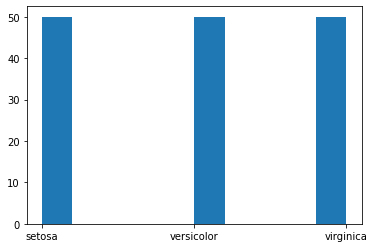

In [3]:
plt.hist(data.Species)

In [4]:
## nombre de las especies
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
## dividir el dataset en variables predictoras y variables a predecir
colnames=data.columns.values.tolist()
## Columnas predictoras 
predictors=colnames[:4]
target=colnames[4]
target, predictors

('Species', ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'])

In [6]:
## dividir el dataset para testing y entrenamiento
## seleccioanamos todos los valores por debajo de 0.75
data["is_train"]=np.random.uniform(0,1, len(data))<=0.75

In [7]:
data.is_train

0      True
1      True
2      True
3      True
4      True
       ... 
145    True
146    True
147    True
148    True
149    True
Name: is_train, Length: 150, dtype: bool

(array([ 27.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 123.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

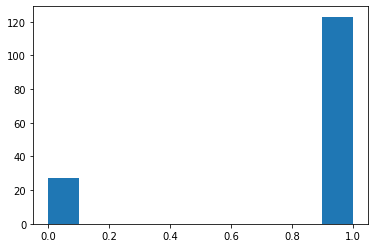

In [8]:
## vemos cuantas están marcadas o son menos a 0.75
plt.hist(data.is_train.astype(int))

In [9]:
## almacenamos los registro para train
train, test=data[data["is_train"]==True], data[data["is_train"]==False]

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
## creamos el árbol
## min_samples_split= determina el máximo de nodos que se deben producir
## min_samples_leaf es el mínimo de elementos por nodo
tree=DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
##creamos el módelo, con los datos de las columnas para predecir y con datos con la la columna target
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [12]:
## almacenamos la predicción
predict = tree.predict(test[predictors])

In [13]:
## cruzamos las tablas
pd.crosstab(test[target], predict, rownames=["Actual"], colnames=["Predictions"] )

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,9,0,0
versicolor,0,12,0
virginica,0,0,6


>Conclución de la tabla, todos los datos son correctos al predecir excepto la al clasificar la planta versiculor donde una planta es clasificada coomo virginica

## Tratamiento de archivos dot

In [14]:
from sklearn.tree import export_graphviz

In [15]:
## indicamos donde vamos a guardar el fichero
with open("archivos/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [16]:
import os 
from graphviz import Source

In [17]:
file=open("archivos/iris_dtree.dot", "r")
text=file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.6\\nentropy = 1.582\\nsamples = 123\\nvalue = [41, 38, 44]"] ;\n1 [label="entropy = 0.0\\nsamples = 41\\nvalue = [41, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Width <= 1.75\\nentropy = 0.996\\nsamples = 82\\nvalue = [0, 38, 44]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Length <= 4.95\\nentropy = 0.461\\nsamples = 41\\nvalue = [0, 37, 4]"] ;\n2 -> 3 ;\n4 [label="Petal.Width <= 1.65\\nentropy = 0.183\\nsamples = 36\\nvalue = [0, 35, 1]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 35\\nvalue = [0, 35, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="entropy = 0.971\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 7 ;\n8 [label="Petal.Length <= 4.85\\nentropy = 0.165\\nsamples = 41\\nvalue = [0, 1, 40]"] ;\n2 -> 8 ;\n9 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n8

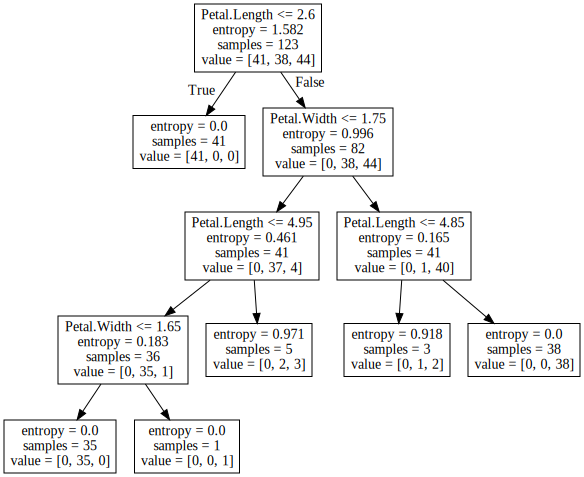

In [18]:
Source(text)

#### Conclusión del gráfico
Cuanto menor es la entropia es mejor
1. Si la flor tiene -2.6 petalos la flor siempre será una "cetoza"
2. En caso de la opción 1 es falsa, si la anchura del petalo es superior 1.75

## Validación cruzada

In [19]:
x=data[predictors]
y=data[target]

In [20]:
tree=DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=20,
                       random_state=99)

In [21]:
from sklearn.model_selection import KFold

In [22]:
## crear 10 grupos
cv = KFold(n_splits=10, shuffle=True, random_state=1)
cv.get_n_splits(x)

10

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
score_=cross_val_score(tree, x, y, scoring="accuracy", cv=cv, n_jobs=1)
score_

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [25]:
score= np.mean(score_)
score

0.9333333333333333

In [26]:
## el escore es el promedio de las eficacias obtenidas
score

0.9333333333333333

In [27]:
X=x
Y=y

In [28]:
## para el número de de niveles del árbol cambia tambien la probabilidad
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    cv.get_n_splits(X)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=-1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_)

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


## Árboles de regresión 

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=10)
forest.fit(X,Y)

c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\Users\Golfa\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=10, n_jobs=2, oob_score=True)

In [31]:
forest.oob_decision_function_

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [       nan,        nan,        nan],
       [1.        , 0.        , 0.        ],
       [1.

In [32]:
forest.oob_score_

0.9466666666666667